# Demo de Modelos de Kohonen:
># - RNA SOM para segmentar datos.
># - RNA LVQ para clasificar.

Basado en  https://github.com/pankajr141/SOM

In [ ]:
#@title Librerías a usar
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import random
import copy
from scipy.spatial.distance import cdist
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import ipywidgets as widgets
from ipywidgets import Box, Layout
from IPython.display import clear_output

import os
import csv

print("Librerías cargadas")

Librerías cargadas


# Datos:

In [ ]:
#@title Acceder al Drive
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demoML/datos/'  #@param {type:"string"}


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#@title Cargar datos

# variables auxiliares
atributo_clase = ""


# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#@markdown ### Archivo de datos a utilizar:
archivo_datos = 'IRIS.csv'  #@param {type:"string"}
#@markdown ### Configuración del archivo CSV:
delimitador_columnas = ',' #@param {type:"string"}

## selección de los parámetros

# función para cargar configuración datos automática
def cargarNombreClases(path, archivo_datos):
  # importa definición de la clase
  arClasesFN = archivo_datos.split('.')[0] + '_nombreClases.txt'
  if os.path.isfile( path + '/' + arClasesFN ):
    with open( path + '/' + arClasesFN, mode='r') as csvfile:
        r = csv.reader(csvfile, delimiter=',')
        auxAtributo = r.__next__()
        auxClases = r.__next__()
    print('\n> Definición de los valores discretos para la clase cargada de ' + arClasesFN +'.\n')
    return auxAtributo[0], ','.join(auxClases)
  else:
    return "", ""

# función auxiliara para que no ejecute UI cada vez
def hacerNada():
  return

# se define esta función para que se ocupe de aplicar la configuración
def on_buttonAplicar_clicked(b):
  print("")
  funcionCambiaSeleccion_ConfigDatos(combo_att_clase.value, texto_nomClases.value, combo_att_entrada.value)

# aplica configuración de datos
def funcionCambiaSeleccion_ConfigDatos(attClase, nomClases, att_entrada):
  global Y, X, nombre_clases, colNames, ClassAttributeName

  if (attClase is None) or (attClase =="") or\
    (att_entrada is None) or (att_entrada ==""):
    return

  # si el atributo clase está como de entrada, lo saca (no tiene sentido)
  att_entrada = list(att_entrada)
  if attClase in att_entrada:
    print("Eliminando atributo " + attClase + " como de entrada dado que es clase.")
    att_entrada.remove( attClase )

  if (att_entrada == "") or (len(att_entrada)==0):
    print("No se han definido atributos de entrada!")
    return

  # guarda configuración
  nombre_clases = nomClases

    # genera los datos solo con los atributos seleccionados
  Y = np.array(df[attClase])
  X = np.array(df[att_entrada])

  # muestra resultados
  print("\n> Atributos entrada: ", att_entrada)
  print("\t X: ", X.shape)

  if (nombre_clases is None) or (nombre_clases==""):
    print("\n> Atributo clase: ", attClase)
  else:
    print("\n> Atributo clase: ", attClase, " [", nombre_clases, "]")
  print("\t Y: ", Y.shape)
  # para usar luego
  colNames = att_entrada
  ClassAttributeName = attClase

## aplicación de los parámetros elegidos

# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + archivo_datos,  sep=delimitador_columnas, engine="python")
print("Archivo de datos ", archivo_datos, " cargado")

print("\n> Cabecera: ")
print(df.head())
print("\n> Características: ")
print(df.describe())
print("\n")

# inicializa valores
X = None
Y = None
colNames = []
ClassAttributeName = ""

# intenta cargar configuración asociada a los datos
# trata de obtener la configuración del archivo asociado
atributo_clase, nombre_clases = cargarNombreClases(path, archivo_datos)

# muestra interface para cargar configuración

# auxiliar para que muestre bien la descripción
style_3D = {'description_width': 'initial'}

tit = widgets.Label("Ajuste para configuración de los Datos: ")

# prepara combo para determinar atributo clase
selecc_atributos = [ ]
selecc_atributos.extend( df.columns.values.tolist() )
if (atributo_clase is None) or (atributo_clase=="") or (atributo_clase not in selecc_atributos):
  att_selecc_defecto = len(selecc_atributos)-1
else:
  att_selecc_defecto = selecc_atributos.index(atributo_clase)
combo_att_clase = widgets.Dropdown(
    options = selecc_atributos,
    value = selecc_atributos[att_selecc_defecto], # mostrar por defecto de config
    description = 'Atributo clase:',
    style=style_3D,
    disabled = False,
)
# prepara campo para ingresar nombre clases (toma por defecto de config)
texto_nomClases = widgets.Text(
    value=nombre_clases,
    placeholder='Ingrese nombre clases (si corresponde) separados por comas',
    description='Nombre clases:',
    style=style_3D,
    disabled=False
)

combo_att_entrada = widgets.SelectMultiple(
    options=selecc_atributos,
    value=selecc_atributos,
    #rows=10,
    description='Atributos de entrada:',
    style=style_3D,
    disabled=False
)

# prepara botón y grilla con objetos
btnAplicar = widgets.Button(
    description='Aplicar'
)
configDatos_ui = widgets.GridBox(
      children=[tit, combo_att_clase, texto_nomClases, combo_att_entrada, btnAplicar],
      layout=Layout(width='100%')  )
btnAplicar.on_click(on_buttonAplicar_clicked)

#clear_output()
out_config = widgets.interactive_output(hacerNada, {})
display(configDatos_ui)

# ejecuta para que muestre
on_buttonAplicar_clicked(btnAplicar)


Archivo de datos  IRIS.csv  cargado

> Cabecera: 
   LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo  Clase
0          5.1          3.5          1.4          0.2      1
1          4.9          3.0          1.4          0.2      1
2          4.7          3.2          1.3          0.2      1
3          4.6          3.1          1.5          0.2      1
4          5.0          3.6          1.4          0.2      1

> Características: 
       LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo       Clase
count   150.000000   150.000000   150.000000   150.000000  150.000000
mean      5.843333     3.054000     3.758667     1.198667    2.000000
std       0.828066     0.433594     1.764420     0.763161    0.819232
min       4.300000     2.000000     1.000000     0.100000    1.000000
25%       5.100000     2.800000     1.600000     0.300000    1.000000
50%       5.800000     3.000000     4.350000     1.300000    2.000000
75%       6.400000     3.300000     5.100000     1.800000    3.000000
max

GridBox(children=(Label(value='Ajuste para configuración de los Datos: '), Dropdown(description='Atributo clas…


Eliminando atributo Clase como de entrada dado que es clase.

> Atributos entrada:  ['LargoSepalo', 'AnchoSepalo', 'LargoPetalo', 'AnchoPetalo']
	 X:  (150, 4)

> Atributo clase:  Clase  [ na,Setosa,Versicolor,Virginica ]
	 Y:  (150,)


In [ ]:
#@title Preparar datos


#@markdown Porcentaje de datos para usar en el entrenamiento:
proporcion_porcentaje_datos_entrenamiento =   75#@param {type:"integer"}

# determina la proporción a usar para entrenar y probar
if proporcion_porcentaje_datos_entrenamiento>100:
  propTrain = 1
elif proporcion_porcentaje_datos_entrenamiento<1:
  propTrain = 0.1
else:
  propTrain = proporcion_porcentaje_datos_entrenamiento/100

# separa al azar usando muestreo con proporción indicada
# intenta hacer muestreo estatificado
try:
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(1-propTrain), stratify=Y, shuffle=True)
except ValueError:
  print("-- No se puede aplicar Muestreo Estratificado! -> se usa Muestreo Simple \n")
  # hace muestreo simple
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(1-propTrain), shuffle=True)

# toma configuración de nombre de clases
CLASES = []
# define nombre de clases
if (nombre_clases == "") or (nombre_clases == "-"):
    # toma los valores de clase orginales del archivo
    if str(Y[0]).replace(".","").isnumeric():
      # Y son numeros
      for val in range(int(np.max(Y))+1):
        CLASES.append( "clase {:>3}".format(val) )
    else:
        # Y no son números
        CLASES = list(set(Y))
        CLASES.sort()
        # cambia valores para que sean enteros
        y_train = [ CLASES.index(y) for y in y_train]
        y_test = [ CLASES.index(y) for y in y_test]
else:
    # toma configuración de nombre de clases
    for val in nombre_clases.split(','):
      CLASES.append( val )

# muestra resultados
print("> Para Ambos: ")
print(" - dictMapeo: ", CLASES)

print("\n> Para Entrenamiento: ")
print(" - x_train (cant ejemplos, datos entrada): ", x_train.shape)
print(" - y_train (cant): ", len(y_train))
for i in range(len(CLASES)):
  cant = 0
  for y in y_train:
      if i == int(y): cant = cant + 1
  print("    ", CLASES[i], "[", i, "]:", cant)

print("\n Para Prueba: ")
print(" - x_test (cant ejemplos, datos entrada): ", x_test.shape)
print(" - y_test (cant): ", len(y_test))
for i in range(len(CLASES)):
  cant = 0
  for y in y_test:
      if i == int(y): cant = cant + 1
  print("    ", CLASES[i], "[", i, "]:", cant)


> Para Ambos: 
 - dictMapeo:  ['na', 'Setosa', 'Versicolor', 'Virginica']

> Para Entrenamiento: 
 - x_train (cant ejemplos, datos entrada):  (112, 4)
 - y_train (cant):  112
     na [ 0 ]: 0
     Setosa [ 1 ]: 38
     Versicolor [ 2 ]: 37
     Virginica [ 3 ]: 37

 Para Prueba: 
 - x_test (cant ejemplos, datos entrada):  (38, 4)
 - y_test (cant):  38
     na [ 0 ]: 0
     Setosa [ 1 ]: 12
     Versicolor [ 2 ]: 13
     Virginica [ 3 ]: 13


# RNA KOHONEN SOM:

In [ ]:
#@title Establecer Clase RNA SOM

# clase copiada de https://github.com/pankajr141/SOM/blob/master/somlib/som_numpy.py
# con algunas modificaciones menores
class SOM():
    """
    The numpy based Kohonen self organizing map implementation.
    """
    def __init__(self, neurons, n_iter=500, learning_rate=0.05, mostrarDetalle=True):
        self.neurons = neurons
        self.initial_learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.centroides = None
        self.mostrarDetalle_ = mostrarDetalle

    def resetState(self, dimentions):
        neighbourhood_radius = np.sum(self.neurons)
        self.weights = np.random.randint(0, 255, size=(self.neurons[0], self.neurons[1], dimentions)) / 255
        self.learning_rate = self.initial_learning_rate
        self.initial_neighbourhood_radius = neighbourhood_radius
        self.neighbourhood_radius = neighbourhood_radius
        self.time_constant = self.n_iter/np.log(self.initial_neighbourhood_radius)
        if self.mostrarDetalle_:
          print("      Pesos iniciales: ")
          for i in range(self.weights.shape[0]):
            for j in range(self.weights.shape[1]):
              print("             Cluster_"+str(i*self.weights.shape[1]+j+1), ":", self.weights[i,j])
          print("\n")

    def _updateWeights(self, sample):
        dimentions = self.weights.shape

        # Fund BMU neuron
        distances = cdist(self.weights.reshape(dimentions[0]*dimentions[1], dimentions[2]), sample, metric='euclidean')
        distances = distances.reshape(dimentions[0], dimentions[1])
        indices = np.where(distances == distances.min())  # Getting the neuron with min distance

        """ Caculate how much each neighbourhood neurons will affect the weight basted on their distance"""
        closestNeuron = self.weights[indices[0][0], indices[1][0]]

        # Calcualte the euclidean distances of neurons from BMU
        distances = cdist(self.weights.reshape(dimentions[0] * dimentions[1], dimentions[2]),
                          closestNeuron.reshape(1, dimentions[2]), metric='euclidean')
        # Arrange distances as sorted index
        distances = np.argsort(np.argsort(distances.reshape(dimentions[0] * dimentions[1])))
        distances = distances.reshape(dimentions[0], dimentions[1])

        # Mark the neurons with distance greater then neighbourhood_radius as with influence 0
        influenceVector = copy.deepcopy(distances)
        influenceVector[distances > self.neighbourhood_radius] = -1
        influenceVector[influenceVector >= 0] = 1
        influenceVector[influenceVector == -1] = 0

        influenceValues =  np.exp(-np.multiply(distances, distances) / (2 * self.neighbourhood_radius * self.neighbourhood_radius))
        influenceValues = np.multiply(influenceVector, influenceValues)
        influenceValues = influenceValues.reshape(self.weights.shape[0], self.weights.shape[1], 1)

        """Update weights using learning rate, influence """
        self.weights = self.weights + np.multiply(influenceValues, (sample - self.weights))  * self.learning_rate

    def _updateLearningRate(self, iteration):
        """Function to update the learning rate"""
        self.learning_rate = self.initial_learning_rate * np.exp(-iteration/self.n_iter)

    def _updateNeighbourhoodRadius(self, iteration):
        """Function to update the neighbourhood radius"""
        self.neighbourhood_radius = self.initial_neighbourhood_radius * np.exp(-iteration/self.time_constant)

    def train(self, data):
        if len(data) == 0:
          print("No hay datos para entrenar!")
          return
        if self.mostrarDetalle_:
          print("\n *** Comienza el entrenamiento ***")
        # inicializa parámetros del entrenamiento
        self.resetState(len(data[0]))
        # prepara the data
        samples = self.prepareData(data)
        # Define Time constant used by learning rate and neighbourhood radius
        for it in range(1, self.n_iter+1):
            if self.mostrarDetalle_:
              if (it==1) or (it%10)==1 or (it==(self.n_iter)):
                print("     ", it, ": lr =", round(self.learning_rate, 5))
            for _ in samples:
                sample = random.choice(samples)
                """For each sample check which neuron has closest proximity"""
                self._updateWeights(sample)
            self._updateLearningRate(it)
            self._updateNeighbourhoodRadius(it)
        # cambia estructura de los clusters para mostrar centroides
        self.centroides = self.weights.reshape(self.weights.shape[0] * self.weights.shape[1], self.weights.shape[2])
        if self.mostrarDetalle_:
          print("\n *** Entrenamiento finalizado ***")

    def assignClusters(self, data):
        if self.centroides is None:
          return []
        # prepara the data
        samples = self.prepareData(data)
        # predict
        result = []
        for sample in samples:
            distances = cdist(self.centroides, sample, metric='euclidean')
            indices = np.where(distances == distances.min())  # Getting the neuron with min distance
            result.append( "Cluster_"+str(indices[0][0]+1) )
        return np.array(result)

    def prepareData(self, data):
      # determina cantidad de dimensiones a usar
      # fromatea los datos para que se pueda entrenrar
      samples = []
      cantDim = len(data[0])
      for x in data:
        samples.append( x.reshape(1, cantDim) )
      return samples

    def getCentroides(self, colNames):
      # devuelve los centroides / pesos de las conexiones
      colDict = {}
      for l in range(len(self.centroides)):
        # agrega columna clusters
        cl = "Cluster_"+str(l+1)
        if "SOM" in colDict:
          colDict["SOM"].append( cl )
        else:
          colDict["SOM"] = [ cl ]
        # agrega las otras
        for col, centroide in zip(colNames, self.centroides[l]):
          if col in colDict:
            colDict[col].append( centroide )
          else:
            colDict[col] = [centroide]
      return colDict

    def showCentroides(self, colNames):
      # muestra los centroides / pesos de las conexiones
      print("\n\nCluster Centroides: \n")
      # genera df auxiliar
      centroidesTable = pd.DataFrame( self.getCentroides(colNames) )
      display( centroidesTable )


print("Clase RNA SOM definida")


# funciones auxiliares
def genTableClusters(rna, x_datos, x_colNames, y_datos, y_colName, inclCentroides=False):
  # diccionario para generar la tabla
  colDict = {}
  # formatea otras columnas
  for i in range(len(x_colNames)):
    colDict[x_colNames[i]] = x_datos[:, i]
  # formatea clase original
  clasesAsign = []
  for d in y_datos:
    clasesAsign.append( CLASES[d] )
  colDict[y_colName] = clasesAsign
  # aplica SOM sobre datos
  if isinstance(rna, SOM):
    # es SOM
    y_Clust = rna.assignClusters(x_datos)
    colDict["SOM"] = y_Clust
    # genera tabla
    auxTable = pd.DataFrame(colDict)
    if inclCentroides and len(x_colNames)>0:
      # agrega los centroides en la tabla
      colDictCentr = rna.getCentroides(x_colNames)
      for k in x_colNames:
        colDict[k] = np.concatenate( (np.array(colDict[k]), np.array(colDictCentr[k])), axis=0)
      colDict["SOM"] = np.concatenate( (np.array(colDict["SOM"]), np.array( [c.replace("Cluster", "CENTROIDE") for c in colDictCentr["SOM"]])), axis=0)
      cantCentr = len(colDictCentr["SOM"])
      colDict[y_colName] = np.concatenate( (np.array(colDict[y_colName]), np.repeat("CENTROIDE", cantCentr)), axis=0)
  else:
    # es LVQ
    y_Clust = rna.assignClusters(x_datos, CLASES)
    colDict["LVQ"] = y_Clust
  # genera tabla
  auxTable = pd.DataFrame(colDict)
  return auxTable

def genGraph_Scatter(ndf, colx, coly, colz, titulo):
  if colx not in ndf or coly not in ndf or (colz!="" and colz not in ndf):
    if colx not in ndf:
      print("Nombre de columna X '" + colx + "' no existente!!")
    elif coly not in ndf:
      print("Nombre de columna Y '" + coly + "' no existente!!")
    elif (colz!="-" and colz!="" and colz not in ndf):
      print("Nombre de columna Z '" + colz + "' no existente!!")
    return
  else:
    fig = plt.figure(figsize=(15,8))
    if colz == "" or colz=="-":
      # gráfico general
      plt.scatter(ndf[colx], ndf[coly])
    else:
      # gráfico marcando colores por valor de colz
      legValues = []
      for val in  ndf[colz].unique():
        # solo muestra los centroides cuando se elige SOM o LVQ
        if (colz in ["SOM", "LVQ"]) or (val!="CENTROIDE"):
          auxDF = ndf[ ndf[colz] == val]
          auxDF = auxDF.drop(labels=colz, axis=1)
          plt.scatter(auxDF[colx], auxDF[coly])
          legValues.append(val)
      plt.legend(legValues, loc='best')
    plt.xlabel(colx)
    plt.ylabel(coly)
    plt.grid(color='lightgrey', which='major', axis='y', linestyle='solid', linewidth=0.3)
    plt.grid(color='lightgrey', which='major', axis='x', linestyle='solid', linewidth=0.3)
    plt.show()


def generar_estadisticas_detalladas(orDF, titulo=""):
  # título
  print("\n", titulo, ": ")
  # obtiene las estadísticas generales
  estDF = orDF.describe().transpose()
  #  genera y formatea las estadísticas
  if "min" in estDF and "max" in estDF:
    rangoValores = "[ " + estDF["min"].apply('{:.2f}'.format) + " ; " + estDF["max"].apply('{:.2f}'.format) + " ]"
  else:
    rangoValores = estDF["unique"].fillna(0.0).apply('{:.0f}'.format)
  rangoValores.name = "Rango Valores"
  # para campos no numéricos muestra las cantidades por valor
  for col in orDF.columns:
    if orDF[col].dtypes in ("object", "bool"):
      auxStr = str( orDF[col].value_counts() ).replace("\n", " ; ")
      if (auxStr.index("Name")-3) > 0:
        # saca lo del final porque no sirve
        auxStr = auxStr[:auxStr.index("Name")-3]
      rangoValores[col] = "{ " + auxStr + " }"
  if "mean" in estDF and "std" in estDF:
    promValores = estDF["mean"].fillna(0.0).apply('{:.3f}'.format) + " ± " + estDF["std"].fillna(0.0).apply('{:.3f}'.format)
  else:
    promValores = estDF["count"].apply('{:.0f}'.format)
  promValores.name = "Promedio ± Desvío"
  # obtiene valores "ceros" y nulos
  zero_val = (orDF == 0.00).astype(int).sum(axis=0)
  zero_val.name = "¿Valores Ceros?"
  mis_val = orDF.isnull().sum()
  mis_val.name = "¿Valores Nulos?"
  # prepara la nueva tabla para mostrar
  nTable = pd.concat([orDF.dtypes, rangoValores, promValores, zero_val, mis_val], axis=1)
  nTable = nTable.rename( columns = {0: 'Tipo Valor',  1: 'Rango Valores', 2: 'Promedio ± Desvío', 3: '¿Valores Ceros?', 4: '¿Valores Nulos?' } )
  # muestra la nueva tabla
  pd.set_option('max_colwidth', None)
  display(nTable.fillna("-"))
  print("Tiene " + str(orDF.shape[1]) + " atributos y " + str(orDF.shape[0]) + " ejemplos.")
  print("\n")
  return

def mostrarEstadisticasCusters(df):
  # mostrar nuevas estadísticas por Cluster
  print("> Estadísticas: ")
  atributo_clase = "SOM"
  ndf = df.sort_values(by=list([atributo_clase]))
  for val in  ndf[atributo_clase].fillna("-NAN-").unique():
      auxDF = ndf[ ndf[atributo_clase].fillna("-NAN-") == val]
      auxDF = auxDF.drop(labels=atributo_clase, axis=1)
      generar_estadisticas_detalladas(auxDF, "-" + str(val) )


print("Funciones auxiliares para mostrar resultados de RNA SOM definidas")


Clase RNA SOM definida
Funciones auxiliares para mostrar resultados de RNA SOM definidas


In [ ]:
#@title Entrenar RNA SOM

SOM_cant_neuronas_salida_n = 2 #@param {type:"integer"}
SOM_cant_neuronas_salida_m =  2#@param {type:"integer"}

SOM_learning_rate_SOM = 0.05 #@param {type:"number"}
SOM_cant_ciclos_entrenamiento_SOM = 500 #@param {type:"integer"}

# controla los parámetros
if SOM_cant_neuronas_salida_n < 1:
  SOM_cant_neuronas_salida_n = 1
if SOM_cant_neuronas_salida_m < 1:
  SOM_cant_neuronas_salida_m = 1
if (SOM_cant_neuronas_salida_n * SOM_cant_neuronas_salida_m) < 2:
  SOM_cant_neuronas_salida_n = 2
  SOM_cant_neuronas_salida_m = 1
if SOM_cant_ciclos_entrenamiento_SOM < 500:
  print("Se debe ciclar por lo menos 500 veces")
  SOM_cant_ciclos_entrenamiento_SOM = 500
if SOM_learning_rate_SOM <= 0:
  SOM_learning_rate_SOM = 0.05


# inicializa la SOM
rnaSOM = SOM(neurons=(SOM_cant_neuronas_salida_n, SOM_cant_neuronas_salida_m),
             n_iter=SOM_cant_ciclos_entrenamiento_SOM,
             learning_rate=SOM_learning_rate_SOM)

# manda a entrenar
rnaSOM.train(x_train)

# muestra centroides
rnaSOM.showCentroides(colNames)


 *** Comienza el entrenamiento ***
      Pesos iniciales: 
             Cluster_1 : [0.64313725 0.20784314 0.69803922 0.54901961]
             Cluster_2 : [0.22352941 0.18823529 0.55294118 0.20784314]
             Cluster_3 : [0.89019608 0.85490196 0.66666667 0.88627451]
             Cluster_4 : [0.17647059 0.10980392 0.78431373 0.56078431]


      1 : lr = 0.05
      11 : lr = 0.04901
      21 : lr = 0.04804
      31 : lr = 0.04709
      41 : lr = 0.04616
      51 : lr = 0.04524
      61 : lr = 0.04435
      71 : lr = 0.04347
      81 : lr = 0.04261
      91 : lr = 0.04176
      101 : lr = 0.04094
      111 : lr = 0.04013
      121 : lr = 0.03933
      131 : lr = 0.03855
      141 : lr = 0.03779
      151 : lr = 0.03704
      161 : lr = 0.03631
      171 : lr = 0.03559
      181 : lr = 0.03488
      191 : lr = 0.03419
      201 : lr = 0.03352
      211 : lr = 0.03285
      221 : lr = 0.0322
      231 : lr = 0.03156
      241 : lr = 0.03094
      251 : lr = 0.03033
      261 : lr = 0.

,SOM,LargoSepalo,AnchoSepalo,LargoPetalo,AnchoPetalo
0,Cluster_1,6.264360,2.892284,4.889977,1.677402
1,Cluster_2,5.113817,3.402250,1.552270,0.297780
2,Cluster_3,6.449328,2.967605,5.184923,1.842111
3,Cluster_4,4.996053,3.245846,1.609923,0.309349


In [ ]:
#@title Evaluar clusters asignados por RNA SOM {run:"auto"}

SOM_generar_grafico_usar_datos = "entrenamiento" #@param ["entrenamiento", "prueba"]

if SOM_generar_grafico_usar_datos == "entrenamiento":
  xSOM = x_train
  ySOM = y_train
else:
  xSOM = x_test
  ySOM = y_test

SOM_mostrar_tabla_completa = False #@param {type:"boolean"}
SOM_mostrar_estadisticas_cluster = False #@param {type:"boolean"}
SOM_mostrarCentroidesEnGrafico = True #@param {type:"boolean"}

# genera la tabla con los datos de entrenamiento
dfSOM = genTableClusters(rnaSOM, xSOM, colNames, ySOM, ClassAttributeName, SOM_mostrarCentroidesEnGrafico)

# muestra la tabla
if SOM_mostrar_tabla_completa:
  print("Resultados de aplicar SOM en datos de " + SOM_generar_grafico_usar_datos + ": ")
  display(dfSOM)
  print("\n")
# mostrar estadísticas
if SOM_mostrar_estadisticas_cluster:
  mostrarEstadisticasCusters(dfSOM)
  print("\n")

# agrega los combos
comboColX = widgets.Dropdown(
    options=colNames,
    value=colNames[0],
    description='Columna X:',
    disabled=False,
)
if len(colNames)>1:
  valYsel = colNames[1]
else:
  valYsel = colNames[0]

comboColY = widgets.Dropdown(
    options=colNames,
    value=valYsel,
    description='Columna Y:',
    disabled=False,
)

comboColZ = widgets.Dropdown(
    options=[ClassAttributeName, "SOM"],
    value="SOM",
    description='Columna Z:',
    disabled=False,
)

ui = widgets.HBox([comboColX, comboColY, comboColZ])

def cambiaSeleccionSOM(x, y, z):
  # genera el gráfico
  genGraph_Scatter(dfSOM, x, y, z, "")

out = widgets.interactive_output(cambiaSeleccionSOM, {'x': comboColX, 'y': comboColY, 'z': comboColZ})
display(ui, out)

Output()

In [ ]:
#@title Guardar RNA SOM

guardar_modelo_SOM = False #@param{type:"boolean"}
path_modelo_SOM = '/content/gdrive/MyDrive/IA/demoML/modelos/datosKHN'  #@param {type:"string"}

if guardar_modelo_SOM:

    import joblib
    import os

    # si no existe el directorio, lo crea
    if not os.path.isdir(path_modelo_SOM):
      os.makedirs(path_modelo_SOM)

    # guarda el modelo entrenado
    fn_modelo = path_modelo_SOM + "/RNA_SOM.joblib"
    joblib.dump(rnaSOM, fn_modelo)
    print("\n-RNA SOM guardado en ", fn_modelo,"\n")

else:
    print("\n-RNA SOM no guardado.")


-RNA SOM no guardado.


# RNA KOHONEN LVQ:

In [ ]:
#@title Establecer Clase RNA LVQ

# se toma LVQ con modificaciones correspondientes
class LVQ():

    def __init__(self, qtyClassValues=2, clustersPerClass=2, learning_rate=0.15, iniWeightSOM=True):
        self.neurons = (qtyClassValues, clustersPerClass)
        self.initial_learning_rate = learning_rate
        self.n_iter = 10 # siempre son 10 ciclos
        self.weights = None
        self.iniWeightSOM = iniWeightSOM


    def iniWeightsRealValues(self, dataX, dataY):
        #  rellena los pesos con ejemplos de cada clase
        # (esos ejemplos se deberían sacar para no entrenarlos)
        for i in range(self.dimentions[0]):
          for j in range(self.dimentions[1]):
              # busca ejemplos que corresponden a esa clase
              arPos = np.where(np.array(dataY)==i)[0]
              if len(arPos) > 0:
                pos = random.choice( arPos )
                # carga el registra como peso
                self.weights[i, j] = copy.deepcopy( dataX[pos][0] )
                # y lo saca de los datos
                # porque no es necesario entrenarlas
                dataX.pop(pos)
                dataY = np.delete(dataY, pos)
        return dataX, dataY

    def iniWeightsSOM(self, dataX, dataY, showIniWeights):
        #  rellena los pesos con los centroides de SOM
        for i in range(self.dimentions[0]):
          # busca ejemplos que corresponden a esa clase
          arPos = np.where(np.array(dataY)==i)[0]
          ##print( arPos )
          if len(arPos) > 0:
            # genera datos para SOM
            auxDataSOM = []
            for pos in arPos:
              auxDataSOM.append( dataX[pos].reshape(self.dimentions[2]) )
            if showIniWeights:
              print("            inicializando clase ", i, " con ", len(auxDataSOM), " ejemplos")
            # genera una red SOM
            auxSOM = SOM(neurons=(1, self.dimentions[1]),
              mostrarDetalle=False)
            # manda a entrenar
            auxSOM.train(auxDataSOM)
            # copia los centroides
            for j in range(self.dimentions[1]):
              self.weights[i, j] = copy.deepcopy( auxSOM.weights[0, j] )
        return

    def resetState(self, cantDim, dataX, dataY, showIniWeights):
        self.learning_rate = self.initial_learning_rate
        # primero inicializa la estructura de los pesos con 0s
        self.weights = np.zeros(shape=(self.neurons[0], self.neurons[1], cantDim))
        self.dimentions = self.weights.shape
        if self.iniWeightSOM:
          # inicializa los pesos usando SOM
          if showIniWeights:
            print("      Inicializando pesos de la capa oculta usando SOM ")
          self.iniWeightsSOM(dataX, dataY, showIniWeights)
        else:
          # inicializa los pesos usando valores reales
          # elegidos al azar
          if showIniWeights:
            print("      Inicializando pesos de la capa oculta usando ejemplos reales ")
          dataX, dataY = self.iniWeightsRealValues(dataX, dataY)
        if showIniWeights:
          print("      Pesos iniciales: ")
          for i in range(self.dimentions[0]):
            for j in range(self.dimentions[1]):
              print("            clase ", i, ":", self.weights[i,j])
          print("\n")
        return dataX, dataY


    def _findBMU(self, sample):
        # Fund BMU neuron
        distances = cdist(self.weights.reshape(self.dimentions[0]*self.dimentions[1], self.dimentions[2]), sample, metric='euclidean')
        distances = distances.reshape(self.dimentions[0], self.dimentions[1])
        ##print(distances)
        return np.where(distances == distances.min())  # Getting the neuron with min distance

    def _updateWeights(self, sample, classId):

        # neurona ganadora -> self.weights[indices[0][0], indices[1][0]]
        indices = self._findBMU(sample)
        ##print(indices)

        # analiza si la neurona corresponde a la clase a entrenar
        if indices[1][0] == classId:
          # es correcta, acerca
          tipoAjuste = 1
        else:
          # es incorrecta, aleja
          tipoAjuste = -1
        # ajusta los pesos sólo de la neurona más parecida (con menos distancia)
        error = (sample - self.weights[indices[0][0], indices[1][0]])
        self.weights[indices[0][0], indices[1][0]] = self.weights[indices[0][0], indices[1][0]] + tipoAjuste * error * self.learning_rate
        return error

    def _updateLearningRate(self, iteration):
        """Function to update the learning rate"""
        self.learning_rate = self.initial_learning_rate * (1.0 - (iteration/float(self.n_iter)))

    def train(self, dataX, dataY, showIniWeights=False):
        if (len(dataX) == 0) or (len(dataY) == 0):
          print("Faltan datos para entrenar!")
          return
        if (len(dataX) != len(dataY)):
          print("No coincide la cantidad de datos X con los Y!")
          return
        print("\n *** Comienza el entrenamiento ***")
        # prepara los datos
        samples = self.prepareData(dataX)
        # inicializa parámetros del entrenamiento
        samples, dataY = self.resetState(len(dataX[0]), samples, dataY, showIniWeights)
        # Define Time constant used by learning rate and neighbourhood radius
        for it in range(1, self.n_iter+1):
            print("     ", it, ": lr =", round(self.learning_rate, 5), end="")
            ##print(self.weights)
            sumError = 0
            for s, y in zip(samples, dataY):
                # realiza el ajuste de los pesos y calcula el error
                sumError = sumError + self._updateWeights(s, y)
                break
            print(" - loss =", round(np.sum(sumError),5))
            self._updateLearningRate(it)
        print("\n *** Entrenamiento finalizado ***")

    def predict(self, dataX):
        # prepara the data
        samples = self.prepareData(dataX)
        # predict
        result = []
        for sample in samples:
            # busca neurona ganadora
            indices = self._findBMU(sample)
            #print( indices  )
            result.append( indices[0][0] )
        return np.array(result)

    def assignClusters(self, dataX, classNames):
        # prepara los data
        samples = self.prepareData(dataX)
        # asigna los clusters que corresponde
        result = []
        for sample in samples:
            indices = self._findBMU(sample)
            result.append(classNames[indices[0][0]]+"-Cluster_"+str(indices[1][0]+1))
        return np.array(result)

    def prepareData(self, data):
      # determina cantidad de dimensiones a usar
      # fromatea los datos para que se pueda entrenrar
      samples = []
      cantDim = len(data[0])
      for x in data:
        samples.append( x.reshape(1, cantDim) )
      return samples

    def showCentroides(self, colNames, classColumnName, classNames):
      # muestra los centroides / pesos de las conexiones
      print("\n\nCluster Centroides: \n")
      colDict = {}
      for c in range(self.dimentions[0]):
        # agrega columna de clase
        cname = classNames[c]
        for l in range(self.dimentions[1]):
          # agrega columna de clase
          if classColumnName in colDict:
            colDict[classColumnName].append( cname )
          else:
            colDict[classColumnName] = [ cname ]
          # agrega columna clusters
          lname = "Cluster_"+str(l+1)
          if "LVQ" in colDict:
            colDict["LVQ"].append( lname )
          else:
            colDict["LVQ"] = [ lname ]
          # agrega las otras
          for col, centroide in zip(colNames, self.weights[c, l]):
            if col in colDict:
              colDict[col].append( centroide )
            else:
              colDict[col] = [centroide]
      # genera df auxiliar
      centroidesTable = pd.DataFrame(colDict)
      display( centroidesTable )


print("Clase RNA LVQ definida")

Clase RNA LVQ definida


In [ ]:
#@title Entrenar RNA LVQ

LVQ_cant_neuronas_por_valor_clase =  0#@param {type:"integer"}
LVQ_usar_SOM_para_inicializar_pesos = True #@param {type:"boolean"}

LVQ_learning_rate = 0.3 #@param {type:"number"}

# controla los parámetros
if LVQ_cant_neuronas_por_valor_clase < 1:
  LVQ_cant_neuronas_por_valor_clase = 1
if LVQ_learning_rate <= 0:
  LVQ_learning_rate = 0.05


# inicializa la SOM
rnaLVQ = LVQ(qtyClassValues=len(CLASES),
             clustersPerClass=LVQ_cant_neuronas_por_valor_clase,
             learning_rate=LVQ_learning_rate,
             iniWeightSOM=LVQ_usar_SOM_para_inicializar_pesos)

# manda a entrenar
rnaLVQ.train(x_train, y_train, True)

# muestra centroides
rnaLVQ.showCentroides(colNames, ClassAttributeName, CLASES)


 *** Comienza el entrenamiento ***
      Inicializando pesos de la capa oculta usando SOM 
            inicializando clase  1  con  38  ejemplos
            inicializando clase  2  con  37  ejemplos
            inicializando clase  3  con  37  ejemplos
      Pesos iniciales: 
            clase  0 : [0. 0. 0. 0.]
            clase  1 : [4.99634257 3.34707528 1.46098324 0.23918778]
            clase  2 : [5.99390884 2.75648441 4.24622943 1.31028877]
            clase  3 : [6.50299559 2.96559906 5.50154902 2.05255907]


      1 : lr = 0.3 - loss = -0.44359
      2 : lr = 0.27 - loss = -0.57667
      3 : lr = 0.24 - loss = -0.73237
      4 : lr = 0.21 - loss = -0.90813
      5 : lr = 0.18 - loss = -1.09884
      6 : lr = 0.15 - loss = -1.29663
      7 : lr = 0.12 - loss = -1.49113
      8 : lr = 0.09 - loss = -1.67006
      9 : lr = 0.06 - loss = -1.82037
      10 : lr = 0.03 - loss = -1.92959

 *** Entrenamiento finalizado ***


Cluster Centroides: 



,Clase,LVQ,LargoSepalo,AnchoSepalo,LargoPetalo,AnchoPetalo
0,na,Cluster_1,0.000000,0.000000,0.000000,0.000000
1,Setosa,Cluster_1,5.331658,4.207008,1.325187,0.723624
2,Versicolor,Cluster_1,5.993909,2.756484,4.246229,1.310289
3,Virginica,Cluster_1,6.502996,2.965599,5.501549,2.052559


In [ ]:
#@title Mostrar gráfico de clusters asignados por RNA LVQ {run:"auto"}

LVQ_generar_grafico_usar_datos = "entrenamiento" #@param ["entrenamiento", "prueba"]

if LVQ_generar_grafico_usar_datos == "entrenamiento":
  xLVQ = x_train
  yLVQ = y_train
else:
  xLVQ = x_test
  yLVQ = y_test

# genera la tabla con los datos de entrenamiento
dfLVQ = genTableClusters(rnaLVQ, xLVQ, colNames, yLVQ, ClassAttributeName)

# agrega los combos
comboColX = widgets.Dropdown(
    options=colNames,
    value=colNames[0],
    description='Columna X:',
    disabled=False,
)
if len(colNames)>1:
  valYsel = colNames[1]
else:
  valYsel = colNames[0]

comboColY = widgets.Dropdown(
    options=colNames,
    value=valYsel,
    description='Columna Y:',
    disabled=False,
)

comboColZ = widgets.Dropdown(
    options=[ClassAttributeName, "LVQ"],
    value="LVQ",
    description='Columna Z:',
    disabled=False,
)

ui = widgets.HBox([comboColX, comboColY, comboColZ])

def cambiaSeleccionTrainLVQ(x, y, z):
  # genera el gráfico
  genGraph_Scatter(dfLVQ, x, y, z, "")

out = widgets.interactive_output(cambiaSeleccionTrainLVQ, {'x': comboColX, 'y': comboColY, 'z': comboColZ})
display(ui, out)

Output()

  Datos Entrada -> Clase Real / Clase Modelo [resultado]
  [4.9 3.1 1.5 0.1]-> R: Setosa / M: Setosa [ OK ]
  [6.1 2.6 5.6 1.4]-> R: Virginica / M: Virginica [ OK ]
  [5.  3.3 1.4 0.2]-> R: Setosa / M: Setosa [ OK ]
  [5.2 3.5 1.5 0.2]-> R: Setosa / M: Setosa [ OK ]
  [6.2 2.2 4.5 1.5]-> R: Versicolor / M: Versicolor [ OK ]
  [5.6 3.  4.1 1.3]-> R: Versicolor / M: Versicolor [ OK ]
  [7.7 3.  6.1 2.3]-> R: Virginica / M: Virginica [ OK ]
  [4.9 2.5 4.5 1.7]-> R: Virginica / M: Versicolor [ ERROR! ]
  [6.8 3.  5.5 2.1]-> R: Virginica / M: Virginica [ OK ]
  [5.2 4.1 1.5 0.1]-> R: Setosa / M: Setosa [ OK ]
  [5.  3.5 1.3 0.3]-> R: Setosa / M: Setosa [ OK ]
  [5.5 2.3 4.  1.3]-> R: Versicolor / M: Versicolor [ OK ]
  [4.7 3.2 1.3 0.2]-> R: Setosa / M: Setosa [ OK ]
  [6.1 3.  4.9 1.8]-> R: Virginica / M: Virginica [ OK ]
  [5.4 3.9 1.7 0.4]-> R: Setosa / M: Setosa [ OK ]
  [4.9 3.1 1.5 0.1]-> R: Setosa / M: Setosa [ OK ]
  [6.4 2.8 5.6 2.1]-> R: Virginica / M: Virginica [ OK ]
  [5.  2.3 

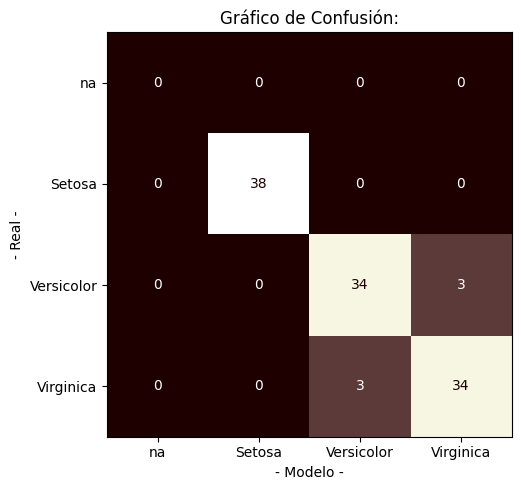

In [ ]:
#@title Evaluar RNA LVQ usando datos de Entrenamiento

mostrar_detalle_entrenamiento = True #@param {type:"boolean"}


# función auxiliar para probar el modelo entrenado en detalle
def probarModeloLVQ(rna, x, y, clases_map, mostrarDetalle=False):

    # procesa las imágenes de prueba con el modelo
    predClass = rna.predict(x)

    if mostrarDetalle:
        print("  Datos Entrada -> Clase Real / Clase Modelo [resultado]")

    # muestra los resultados con las imágenes
    classPreds = []
    classReal = []
    for i in range(len(x)):

        # clase real
        clReal = clases_map[ y[i] ]

        # determina clase predecida
        idclPredRnd =  predClass[i]
        clPred = clases_map[ idclPredRnd ]

        if idclPredRnd<0 or idclPredRnd>=len(clases_map):
            clPred = "CLASE " + str(idclPredRnd) + " INVÁLIDA"
        else:
            clPred = clases_map[ idclPredRnd ]

        classReal.append( clReal )
        classPreds.append( clPred )

        strTitulo = "  "
        strTitulo = strTitulo + str(x[i]) + '-> '
        strTitulo = strTitulo + 'R: ' + str(clReal) +' / M: ' + str(clPred)
        strTitulo = strTitulo + " [ " + ("OK" if (clPred==clReal) else "ERROR!") + " ]"

        # muestra comparación con la imagen
        if mostrarDetalle:
          print(strTitulo)

    # muestra reporte de clasificación
    print("\n Reporte de Clasificación: ")
    print(classification_report(classReal, classPreds, zero_division=0))

    # muestra matriz de confusion
    print('\nMatriz de Confusión ( real / modelo ): ')
    cm = confusion_matrix(classReal, classPreds, labels=clases_map)
    cmtx = pd.DataFrame(
        cm,
        index=['r:{:}'.format(x) for x in clases_map],
        columns=['m:{:}'.format(x) for x in clases_map]
      )
    # agrega para poder mostrar la matrix de confusión completa
    pd.options.display.max_rows = 100
    pd.options.display.max_columns = 100
    cmtx.sort_index(axis=0, inplace=True)
    cmtx.sort_index(axis=1, inplace=True)
    print(cmtx)
    print("\n")

    # gráfico de comparación
    dispCM = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clases_map)
    fig, ax = plt.subplots(figsize=(15,5))
    dispCM.plot(ax=ax, cmap=plt.cm.pink, values_format='g', colorbar=False)
    dispCM.ax_.set_title('Gráfico de Confusión:')
    dispCM.ax_.set(xlabel='- Modelo -', ylabel='- Real -')
    plt.tight_layout()
    plt.show()

probarModeloLVQ(rnaLVQ, x_train, y_train, CLASES, mostrar_detalle_entrenamiento)


  Datos Entrada -> Clase Real / Clase Modelo [resultado]
  [6.6 2.9 4.6 1.3]-> R: Versicolor / M: Versicolor [ OK ]
  [5.1 3.4 1.5 0.2]-> R: Setosa / M: Setosa [ OK ]
  [5.  2.  3.5 1. ]-> R: Versicolor / M: Versicolor [ OK ]
  [4.6 3.1 1.5 0.2]-> R: Setosa / M: Setosa [ OK ]
  [6.8 3.2 5.9 2.3]-> R: Virginica / M: Virginica [ OK ]
  [5.8 2.7 5.1 1.9]-> R: Virginica / M: Virginica [ OK ]
  [5.1 3.8 1.9 0.4]-> R: Setosa / M: Setosa [ OK ]
  [4.4 3.  1.3 0.2]-> R: Setosa / M: Setosa [ OK ]
  [6.3 3.3 4.7 1.6]-> R: Versicolor / M: Versicolor [ OK ]
  [5.8 2.7 3.9 1.2]-> R: Versicolor / M: Versicolor [ OK ]
  [7.1 3.  5.9 2.1]-> R: Virginica / M: Virginica [ OK ]
  [6.3 3.4 5.6 2.4]-> R: Virginica / M: Virginica [ OK ]
  [5.1 3.7 1.5 0.4]-> R: Setosa / M: Setosa [ OK ]
  [5.7 4.4 1.5 0.4]-> R: Setosa / M: Setosa [ OK ]
  [7.7 2.8 6.7 2. ]-> R: Virginica / M: Virginica [ OK ]
  [5.5 2.6 4.4 1.2]-> R: Versicolor / M: Versicolor [ OK ]
  [5.6 2.5 3.9 1.1]-> R: Versicolor / M: Versicolor [ OK 

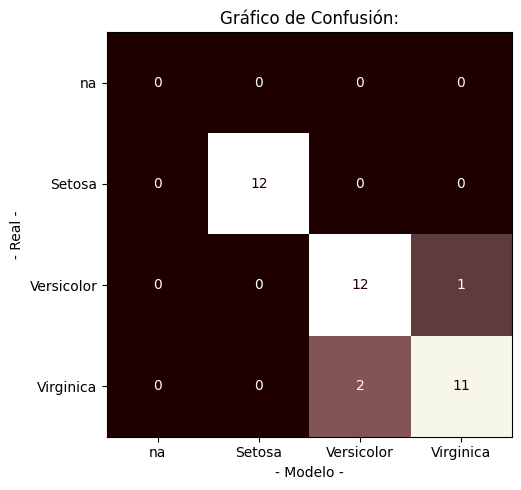

In [ ]:
#@title Evaluar RNA LVQ usando datos de Prueba
mostrar_detalle_prueba = True #@param {type:"boolean"}

probarModeloLVQ(rnaLVQ, x_test, y_test, CLASES, mostrar_detalle_prueba)


In [ ]:
#@title Guardar RNA LVQ

guardar_modelo_LVQ = False #@param{type:"boolean"}
path_modelo_LVQ = '/content/gdrive/MyDrive/IA/demoML/modelos/datosKHN'  #@param {type:"string"}

if guardar_modelo_LVQ:

    import joblib
    import os

    # si no existe el directorio, lo crea
    if not os.path.isdir(path_modelo_LVQ):
      os.makedirs(path_modelo_LVQ)

    # guarda el modelo entrenado
    fn_modelo = path_modelo_LVQ+"/RNA_LVQ.joblib"
    joblib.dump(rnaLVQ, fn_modelo)
    print("\n-RNA LVQ guardado en ", fn_modelo,"\n")

    if ("CLASES" in locals()) and (CLASES is not None):
      fn_clases = path_modelo_LVQ+"/CLASES_MAP.txt"
      with open(fn_clases, 'w') as f:
        for i in range(len(CLASES)):
          f.write(str(i)+":"+str(CLASES[i])+"\n")
      print("\n-CLASES_MAP para mostrar los resultados guardado en ", fn_clases,"\n")

else:
    print("\n-RNA LVQ no guardado.")


-RNA LVQ no guardado.
